In this notebook we will be working on the famous binary classification problem using the titanic dataset. The goal is to correctly classify those that survived the titanic.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
#Read in the training data
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**List of features with missing values:**
- Age
- Cabin
- Embarked

If we want to use these features in our model, we need to find a way to handle the missing data first.

## Categorical Data Analysis:

So for categorical data, let us see the correlation they have with the 'Survived' feature by grouping the categories and calculating the mean.

**List of Categorical Features:**
- Pclass
- Embarked
- Sex
- SibSp
- Parch

In [4]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [5]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [6]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [8]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**Trends that we can observe:**
- Females had a much higher survival rate than males
- First class people had higher survival rate (Pclass = 1)
- Those that embarked in Cherbourg had higher survival rate (Embarked = C)

# Numerical Data Analysis:

Now lets take a look at our numerical data. We will be using histograms to visualize the relationships between our numerical data and our target feature, 'Survived'.

**List of Numerical Features:**
- Age
- Fare

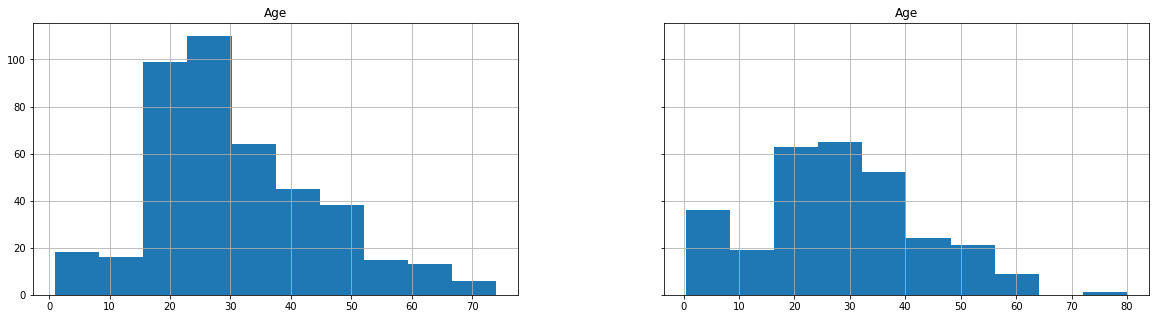

In [9]:
#Left plot is histogram of people who did not survive
#Right plot is histogram of people who did survive
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))
train.loc[train['Survived'] == 0, ['Age']].hist(ax=ax[0])
train.loc[train['Survived'] == 1, ['Age']].hist(ax=ax[1])
plt.show()

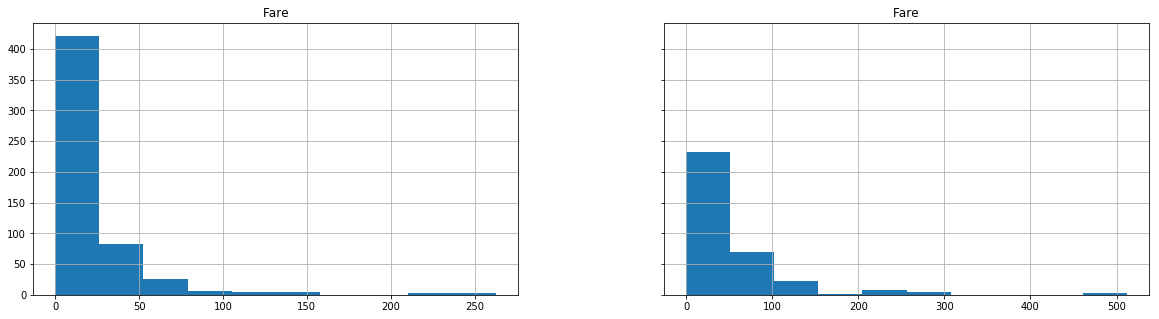

In [10]:
#Left plot is histogram of people who did not survive
#Right plot is histogram of people who did survive
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20, 5))
train.loc[train['Survived'] == 0, ['Fare']].hist(ax=ax[0])
train.loc[train['Survived'] == 1, ['Fare']].hist(ax=ax[1])
plt.show()

**Trends that we observe:**
- More children survived than those that died (Ages 0 - 10)
- Most of the people who purchased a cheap ticket died.

# Handling Missing Data

In [11]:
from sklearn.impute import SimpleImputer

#Fill in Missing Data in Embarked Feature
imp = SimpleImputer(strategy="most_frequent")
embarked_imputed = imp.fit_transform(train['Embarked'].values.reshape(-1,1))
train['Embarked'] = embarked_imputed.reshape(-1)

embarked_imputed_test = imp.transform(test['Embarked'].values.reshape(-1,1))
test['Embarked'] = embarked_imputed_test.reshape(-1)

#Fill in Missing Data in Age Feature
imp = SimpleImputer(strategy='median')
age_imputed = imp.fit_transform(train['Age'].values.reshape(-1,1))
train['Age'] = age_imputed.reshape(-1)

age_imputed_test = imp.transform(test['Age'].values.reshape(-1,1))
test['Age'] = age_imputed_test.reshape(-1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# One Hot Encode the Text Categorical Features

In [12]:
from sklearn.preprocessing import LabelBinarizer

#Encode the 'Sex' Feature (1 = male, 0 = female)
encoder = LabelBinarizer()
sex_encoded = encoder.fit_transform(train['Sex'].values.reshape(-1,1))
train['Sex'] = sex_encoded

sex_encoded_test = encoder.transform(test['Sex'].values.reshape(-1,1))
test['Sex'] = sex_encoded_test

In [13]:
from sklearn.preprocessing import OneHotEncoder

#One Hot Encode the 'Embarked' Category ([0, 0, 1] = S, [1, 0, 0] = C, [0, 1, 0] = Q)
encoder = OneHotEncoder()
embarked_encoded = encoder.fit_transform(train['Embarked'].values.reshape(-1,1))
train['Embarked_S'] = embarked_encoded.toarray()[:,2]
train['Embarked_C'] = embarked_encoded.toarray()[:,0]
train['Embarked_Q'] = embarked_encoded.toarray()[:,1]

embarked_encoded_test = encoder.transform(test['Embarked'].values.reshape(-1,1))
test['Embarked_S'] = embarked_encoded_test.toarray()[:,2]
test['Embarked_C'] = embarked_encoded_test.toarray()[:,0]
test['Embarked_Q'] = embarked_encoded_test.toarray()[:,1]

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Embarked_S     891 non-null float64
Embarked_C     891 non-null float64
Embarked_Q     891 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


# Baseline Model (No Feature Engineering)

So, before we do any feature engineering let us train some classifiers on the base features to see how well we perform.

In [15]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

In [16]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train[features],train['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.74301676 0.7877095  0.80898876 0.74157303 0.79661017]
Mean = 0.775579644845515
Std = 0.028008486628003208


In [18]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(forest_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.79888268 0.80446927 0.85393258 0.78089888 0.83050847]
Mean = 0.8137383781115382
Std = 0.025619723777531207


In [19]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.6424581  0.65363128 0.69101124 0.7247191  0.72881356]
Mean = 0.6881266563751092
Std = 0.035435291803186234


In [20]:
#SVM Classifier
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
scores = cross_val_score(svm_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.58659218 0.67597765 0.7247191  0.75280899 0.75141243]
Mean = 0.6983020703336813
Std = 0.06239720084180367


# Feature Engineering

Okay, so the best performance we got before any feature engineering was 80%. With the random forest classifier. Lets take a look at the feature_importance of that model to see which features the random forest classifier found the most useful when making the predictions.

In [21]:
forest_clf.fit(train[features],train['Survived'])
forest_clf.feature_importances_

for feature, weight in zip(features, forest_clf.feature_importances_):
    print("{}: {}".format(feature, weight))

Pclass: 0.08600118503716069
Sex: 0.268414998575696
Age: 0.25399293895129765
SibSp: 0.04949951281631705
Parch: 0.03637739374991802
Fare: 0.2704213610763886
Embarked_S: 0.015131449711236295
Embarked_C: 0.011267564823355967
Embarked_Q: 0.008893595258629417


## Bucketize Age and Fare:

So here we can see that both 'Age' and 'Fare' contribute a lot to our model. Let us try to quantize these values by storing them into discrete values.

In [22]:
train['AgeGroup'] = pd.cut(train['Age'],5, labels=[0,1,2,3,4])
train['FareGroup'] = pd.cut(train['Fare'],4, labels=[0,1,2,3])

test['AgeGroup'] = pd.cut(test['Age'],5, labels=[0,1,2,3,4])
test['FareGroup'] = pd.cut(test['Fare'],4, labels=[0,1,2,3])

## Name Feature

One of the features that we neglected in our model was 'Name'. Lets take a closer look at this feature and see if there is any information we can extract out of it.

In [23]:
train['Name'][0:10].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

So most of the names in this dataset have a 'Title' associated with it (ie. Mr. Mrs. Miss.) lets extract these titles out and see its correlation with the 'Survived' feature.

In [24]:
train['Title'] = train['Name'].str.extract('([a-zA-Z]+)\.')
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')
train[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


Okay, so as we know, females had better survival rate. Therefore people with female titles had better survival rate as well. Whats interesting here is the different male titles like: 'Dr', 'Mr', and, 'Sir' all had different survival rates. These titles could indicate class of the passenger which as we already know correlates with survival rate. Lets try to group these titles into a smaller bucket size.

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S,Embarked_C,Embarked_Q,AgeGroup,FareGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.0,1.0,2,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0,0.0,3,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0,0.0,1.0,4,0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,1.0,0.0,0.0,1,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0,0.0,1,0,Mrs


In [26]:
titles = {'Capt':       'Officer',
          'Col':        'Officer',
          'Major':      'Officer',
          'Jonkheer':   'Royalty',
          'Don':        'Royalty',
          'Sir' :       'Royalty',
          'Dr':         'Officer',
          'Rev':        'Officer',
          'Countess':   'Royalty',
          'Dona':       'Royalty',
          'Mme':        'Mrs',
          'Mlle':       'Miss',
          'Ms':         'Mrs',
          'Mr' :        'Mr',
          'Mrs' :       'Mrs',
          'Miss' :      'Miss',
          'Master' :    'Master',
          'Lady' :      'Royalty'
                    }

for key,value in titles.items():
    train.loc[train['Title'] == key, 'Title'] = value
    test.loc[test['Title'] == key, 'Title'] = value

train[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.701087
Mr,0.156673
Mrs,0.795276
Officer,0.277778
Royalty,0.600000


In [27]:
#Now, we one hot encode the Titles
encoder = OneHotEncoder()
title_encoded = encoder.fit_transform(train['Title'].values.reshape(-1,1))
train['Title_Master'] = title_encoded.toarray()[:,0]
train['Title_Miss'] = title_encoded.toarray()[:,1]
train['Title_Mr'] = title_encoded.toarray()[:,2]
train['Title_Mrs'] = title_encoded.toarray()[:,3]
train['Title_Officer'] = title_encoded.toarray()[:,4]
train['Title_Royalty'] = title_encoded.toarray()[:,5]

title_encoded_test = encoder.transform(test['Title'].values.reshape(-1,1))
test['Title_Master'] = title_encoded_test.toarray()[:,0]
test['Title_Miss'] = title_encoded_test.toarray()[:,1]
test['Title_Mr'] = title_encoded_test.toarray()[:,2]
test['Title_Mrs'] = title_encoded_test.toarray()[:,3]
test['Title_Officer'] = title_encoded_test.toarray()[:,4]
test['Title_Royalty'] = title_encoded_test.toarray()[:,5]

# Fill in Cabin Missing Data

At first, we just disregarded the 'cabin' attribute because it had so much missing information. Let's take a closer look at this feature and see if we can extract any information from it.

In [28]:
train['Cabin'].value_counts().sort_index()

A10      1
A14      1
A16      1
A19      1
A20      1
A23      1
A24      1
A26      1
A31      1
A32      1
A34      1
A36      1
A5       1
A6       1
A7       1
B101     1
B102     1
B18      2
B19      1
B20      2
B22      2
B28      2
B3       1
B30      1
B35      2
B37      1
B38      1
B39      1
B4       1
B41      1
        ..
E12      1
E121     2
E17      1
E24      2
E25      2
E31      1
E33      2
E34      1
E36      1
E38      1
E40      1
E44      2
E46      1
E49      1
E50      1
E58      1
E63      1
E67      2
E68      1
E77      1
E8       2
F E69    1
F G63    1
F G73    2
F2       3
F33      3
F38      1
F4       2
G6       4
T        1
Name: Cabin, Length: 147, dtype: int64

So it seems that the cabin feature is an alphanumeric code in which the first symbol is represented by a letter from A-T. Let's bucketize these features so that each cabin is just represented by the letter.

In [29]:
#First we fill in the missing values of Cabin with 'U' for uknown
train['Cabin'].fillna('U',inplace=True)
test['Cabin'].fillna('U',inplace=True)
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
test['Cabin'] = test['Cabin'].map(lambda x: x[0])
train[['Cabin','Survived']].groupby('Cabin').mean()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
U,0.299854


Interesting, so we see that people situated in different cabins had different survival rates. I guess this is due to the location of the cabin with respect to the lifeboats. We also notice that most people for whom the cabin information was missing, did not survive.

In [30]:
#One Hot Encoding the Cabin Feature
encoder = OneHotEncoder()
cabin_encoded = encoder.fit_transform(train['Cabin'].values.reshape(-1,1))

train['Cabin_A'] = cabin_encoded.toarray()[:,0]
train['Cabin_B'] = cabin_encoded.toarray()[:,1]
train['Cabin_C'] = cabin_encoded.toarray()[:,2]
train['Cabin_D'] = cabin_encoded.toarray()[:,3]
train['Cabin_E'] = cabin_encoded.toarray()[:,4]
train['Cabin_F'] = cabin_encoded.toarray()[:,5]
train['Cabin_G'] = cabin_encoded.toarray()[:,6]
train['Cabin_T'] = cabin_encoded.toarray()[:,7]
train['Cabin_U'] = cabin_encoded.toarray()[:,8]

cabin_encoded_test = encoder.transform(test['Cabin'].values.reshape(-1,1))

test['Cabin_A'] = cabin_encoded_test.toarray()[:,0]
test['Cabin_B'] = cabin_encoded_test.toarray()[:,1]
test['Cabin_C'] = cabin_encoded_test.toarray()[:,2]
test['Cabin_D'] = cabin_encoded_test.toarray()[:,3]
test['Cabin_E'] = cabin_encoded_test.toarray()[:,4]
test['Cabin_F'] = cabin_encoded_test.toarray()[:,5]
test['Cabin_G'] = cabin_encoded_test.toarray()[:,6]
test['Cabin_T'] = cabin_encoded_test.toarray()[:,7]
test['Cabin_U'] = cabin_encoded_test.toarray()[:,8]

# Training Models (After Feature Engineering)

So now that we did some feature engineering, lets train our model on the same machine learning algorithms and see if the extra features helped at all.

In [31]:
features = ['Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'FareGroup', 'Embarked_S', 'Embarked_C',
            'Embarked_Q', 'Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Officer','Title_Royalty',
           'Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Cabin_U']

In [32]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

scores = cross_val_score(tree_clf, train[features], train['Survived'], cv=3, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.79461279 0.81144781 0.79461279]
Mean = 0.8002244668911335
Std = 0.007936103043620026


In [33]:
#Random Forest Classifier
forest_clf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(forest_clf, train[features], train['Survived'], cv=3, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.8047138  0.81481481 0.81481481]
Mean = 0.8114478114478114
Std = 0.004761661826172016


In [34]:
#K Nearest Neighbours
knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.78212291 0.81564246 0.82022472 0.79775281 0.86440678]
Mean = 0.8160299341758792
Std = 0.02771932707738793


In [35]:
#SVM Classifier
svm_clf = SVC(max_iter=2000,gamma='scale')
scores = cross_val_score(svm_clf, train[features], train['Survived'], cv=5, scoring='accuracy')
print('Scores = {}'.format(scores))
print('Mean = {}'.format(scores.mean()))
print('Std = {}'.format(scores.std()))

Scores = [0.8547486  0.82681564 0.8258427  0.79775281 0.86440678]
Mean = 0.8339133062178101
Std = 0.023609551707429673


So our feature engineering definitely helped the model! Earlier, with no feature engineering our best model was the Random Forest with a cross validation accuracy score of 80.6%. Now, our best model is the SVM classifier with a cross validation score of 82.3%.

# Model Ensembling:

One nice way to increase the performance of our model is to combine them together in a technique called "ensemble learning". For now, lets combine our two best performing models, the SVM and KNN.

In [36]:
from sklearn.ensemble import VotingClassifier

svm_clf = SVC(max_iter=2000, probability=True, gamma='auto')
knn_clf = KNeighborsClassifier()
forest_clf = RandomForestClassifier(n_estimators=100)

ensemble_clf = VotingClassifier(
    estimators=[('svm',svm_clf), ('knn',knn_clf), ('forest_clf',forest_clf)],
    voting='soft'
)

In [37]:
from sklearn.metrics import accuracy_score

for clf in (svm_clf, knn_clf, forest_clf,ensemble_clf):
    scores = cross_val_score(clf, train[features], train['Survived'], cv=5, scoring='accuracy')
    print(clf.__class__.__name__, scores.mean())

SVC 0.830542448773613
KNeighborsClassifier 0.8160299341758792
RandomForestClassifier 0.803645062552597
VotingClassifier 0.8327959877820559


So we see that the ensemble classifier outperforms our best model! (Although its only a little bit).

In [38]:
#Now we use the model to make predictions
test['FareGroup'] = test['FareGroup'].fillna(0)
ensemble_clf.fit(train[features],train['Survived'])

predictions = ensemble_clf.predict(test[features])

In [39]:
submissions = pd.DataFrame()
submissions['PassengerId'] = test['PassengerId']
submissions['Survived'] = predictions

submissions.to_csv('submission.csv',index=False)